In [1]:
import pandas as pd
from plotting import CandlePlot

pd.set_option('display.max_columns', None)

In [2]:
df_ma_res = pd.read_pickle('../data/ma_res.pkl')
df_ma_trades = pd.read_pickle('../data/ma_trades.pkl')

In [3]:
df_ma_res['granularity'].unique()

array(['H1', 'H4'], dtype=object)

In [36]:
df_ma_res_h4 = df_ma_res[df_ma_res['granularity'] == 'H4'].copy()
df_ma_trades_h4 = df_ma_trades[df_ma_trades['granularity'] == 'H4'].copy()

In [37]:
df_ma_trades_h4.shape

(18038, 30)

In [38]:
df_ma_res_h4.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'ma_long', 'ma_short', 'cross', 'granularity'],
      dtype='object')

In [39]:
df_cross_summary = df_ma_res_h4[['pair', 'num_trades', 'total_gain', 'cross']].copy()

In [40]:
df_cross_summary.head()

,pair,num_trades,total_gain,cross
96,USD_SGD,266,-853,MA_10_MA_20
97,USD_SGD,248,-297,MA_10_MA_21
98,USD_SGD,543,-1019,MA_20_MA_21
99,USD_SGD,127,235,MA_10_MA_50
100,USD_SGD,103,1217,MA_20_MA_50


In [41]:
df_cross_group = df_cross_summary.groupby(by='cross', as_index=False).sum(numeric_only=True)
df_cross_group.sort_values(by='total_gain', ascending=False, inplace=True)

In [42]:
df_cross_group

,cross,num_trades,total_gain
4,MA_20_MA_200,530,25627
7,MA_50_MA_200,377,11529
1,MA_10_MA_200,728,10715
6,MA_20_MA_50,1319,-3455
3,MA_10_MA_50,1613,-26106
5,MA_20_MA_21,7037,-62613
0,MA_10_MA_20,3300,-72865
2,MA_10_MA_21,3134,-76559


In [43]:
total_pairs = len(df_ma_res_h4['pair'].unique())

In [44]:
total_pairs

12

In [52]:
df_temp = df_ma_res_h4[df_ma_res_h4['cross'] == 'MA_20_MA_200']

In [53]:
df_temp[df_temp['total_gain'] > 0].shape[0]

8

In [54]:
for cross in df_ma_res['cross'].unique():
    df_temp = df_ma_res_h4[df_ma_res_h4['cross'] == cross]
    pairs_gained = df_temp[df_temp['total_gain'] > 0].shape[0]

    print(f'Cross: {cross} - Pairs gained: {pairs_gained} - % gain: {(pairs_gained / total_pairs) * 100:.0f}%')
    

Cross: MA_10_MA_20 - Pairs gained: 1 - % gain: 8%
Cross: MA_10_MA_21 - Pairs gained: 1 - % gain: 8%
Cross: MA_20_MA_21 - Pairs gained: 1 - % gain: 8%
Cross: MA_10_MA_50 - Pairs gained: 4 - % gain: 33%
Cross: MA_20_MA_50 - Pairs gained: 4 - % gain: 33%
Cross: MA_10_MA_200 - Pairs gained: 6 - % gain: 50%
Cross: MA_20_MA_200 - Pairs gained: 8 - % gain: 67%
Cross: MA_50_MA_200 - Pairs gained: 4 - % gain: 33%


In [57]:
df_ma_res[(df_ma_res['total_gain'] > 0) & (df_ma_res['granularity'] == 'H4')].head().sort_values(by='total_gain', ascending=False)

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,ma_long,ma_short,cross,granularity
109,USD_NOK,52,9915,190,-2892,5467,MA_200,MA_10,MA_10_MA_200,H4
100,USD_SGD,103,1217,11,-149,247,MA_50,MA_20,MA_20_MA_50,H4
102,USD_SGD,34,643,18,-180,852,MA_200,MA_20,MA_20_MA_200,H4
101,USD_SGD,52,250,4,-120,907,MA_200,MA_10,MA_10_MA_200,H4
99,USD_SGD,127,235,1,-132,266,MA_50,MA_10,MA_10_MA_50,H4


In [71]:
cross = 'MA_20_MA_200'
df_ma_20_ma_200 = df_ma_res_h4[df_ma_res_h4['cross'] == cross].copy()
df_ma_20_ma_200.sort_values(by='total_gain', ascending=False, inplace=True)

In [73]:
df_ma_20_ma_200

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,ma_long,ma_short,cross,granularity
166,EUR_NOK,38,17938,472,-2367,10628,MA_200,MA_20,MA_20_MA_200,H4
110,USD_NOK,38,8722,229,-2802,6655,MA_200,MA_20,MA_20_MA_200,H4
142,EUR_USD,32,1751,54,-261,760,MA_200,MA_20,MA_20_MA_200,H4
134,GBP_AUD,41,1340,32,-428,1108,MA_200,MA_20,MA_20_MA_200,H4
102,USD_SGD,34,643,18,-180,852,MA_200,MA_20,MA_20_MA_200,H4
174,EUR_AUD,47,353,7,-282,803,MA_200,MA_20,MA_20_MA_200,H4
182,AUD_USD,40,266,6,-227,381,MA_200,MA_20,MA_20_MA_200,H4
118,GBP_USD,46,174,3,-435,712,MA_200,MA_20,MA_20_MA_200,H4
126,GBP_SGD,53,-623,-11,-343,915,MA_200,MA_20,MA_20_MA_200,H4
158,EUR_SGD,48,-1007,-20,-192,594,MA_200,MA_20,MA_20_MA_200,H4


In [89]:
df_gains = df_ma_trades_h4[(df_ma_trades_h4['cross'] == cross) & (df_ma_trades_h4['pair'] == 'USD_NOK')].copy()

In [90]:
df_gains.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,MA_200,MA_10,MA_50,MA_20,MA_21,delta,delta_prev,trade,diff,gain,gain_cum,granularity,pair,ma_long,ma_short,cross
20726,2021-05-24 13:00:00+00:00,76034,8.35304,8.36514,8.33779,8.34714,8.35152,8.36359,8.33640,8.34580,8.35456,8.36683,8.33902,8.34849,8.330708,8.354900,8.302043,8.330878,8.328050,0.000170,-0.004247,1,-0.08650,-865.0,-865.0,H4,USD_NOK,MA_200,MA_20,MA_20_MA_200
20727,2021-06-09 01:00:00+00:00,107405,8.26934,8.27008,8.25318,8.26064,8.26662,8.26745,8.25072,8.25832,8.27206,8.27340,8.25563,8.26295,8.300256,8.264513,8.316706,8.296875,8.300798,-0.003381,0.002042,-1,0.06350,-635.0,-1500.0,H4,USD_NOK,MA_200,MA_20,MA_20_MA_200
20728,2021-06-14 13:00:00+00:00,72230,8.31677,8.32776,8.30263,8.32414,8.31531,8.32636,8.30126,8.32293,8.31823,8.32920,8.30397,8.32535,8.300134,8.321277,8.303185,8.300383,8.298635,0.000249,-0.002532,1,0.50101,5010.1,3510.1,H4,USD_NOK,MA_200,MA_20,MA_20_MA_200
20729,2021-08-26 13:00:00+00:00,118381,8.81830,8.82948,8.79773,8.82515,8.81714,8.82836,8.79612,8.82398,8.81945,8.83082,8.79933,8.82632,8.860892,8.826716,8.909302,8.856791,8.861313,-0.004100,0.002871,-1,-0.23689,2368.9,5879.0,H4,USD_NOK,MA_200,MA_20,MA_20_MA_200
20730,2021-11-05 05:00:00+00:00,71521,8.55332,8.59045,8.55332,8.58826,8.55031,8.58911,8.55028,8.58673,8.55632,8.59184,8.55632,8.58978,8.516073,8.537701,8.437956,8.516353,8.511791,0.000280,-0.008807,1,0.23582,2358.2,8237.2,H4,USD_NOK,MA_200,MA_20,MA_20_MA_200


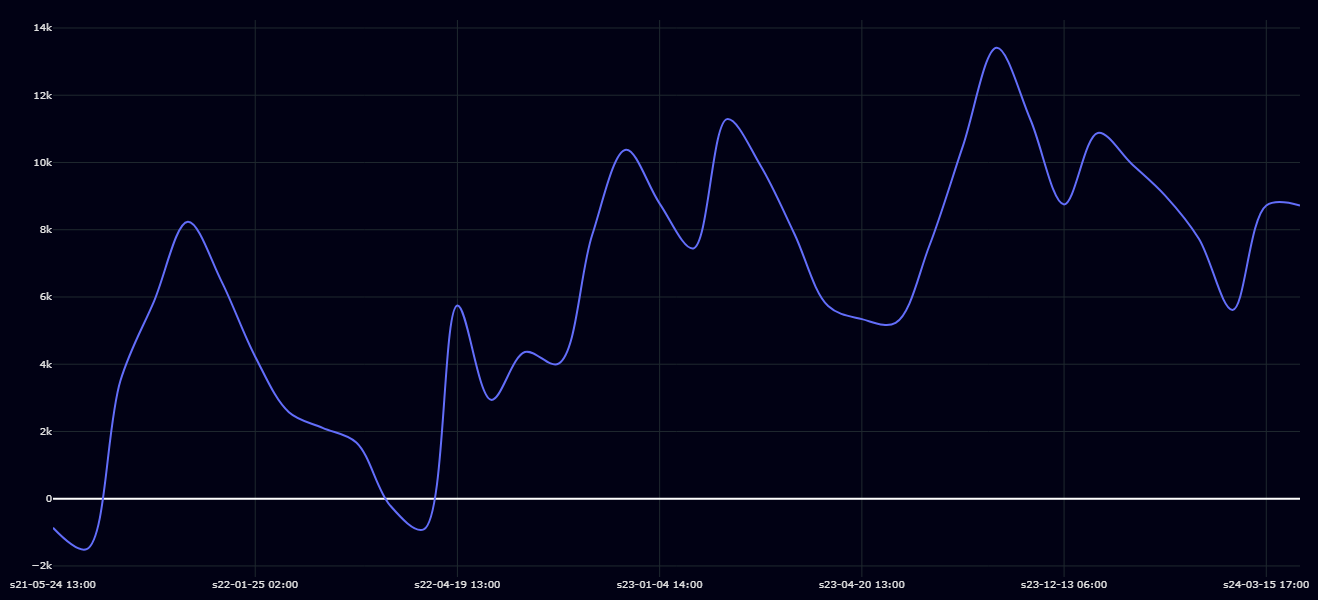

In [91]:
candle_plot = CandlePlot(df_gains, candles=False)
candle_plot.show_plot(line_traces=['gain_cum'])

Pair: EUR_NOK - Gain: 17938.3


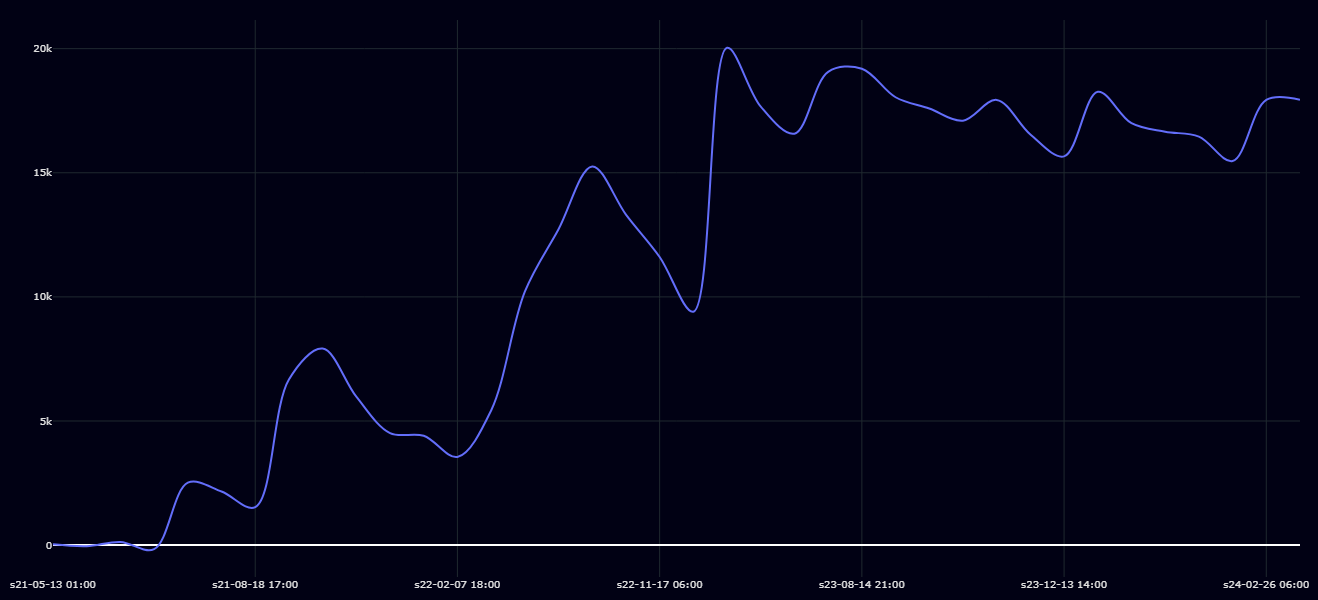

Pair: USD_NOK - Gain: 8722.2


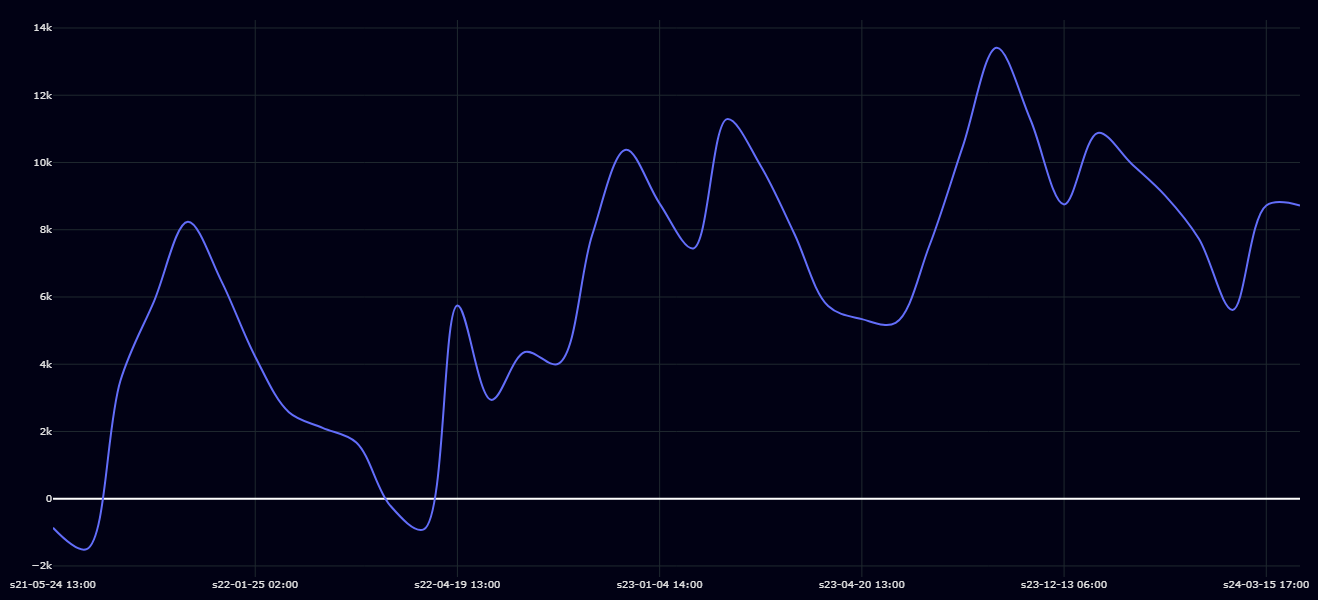

Pair: EUR_USD - Gain: 1751.4


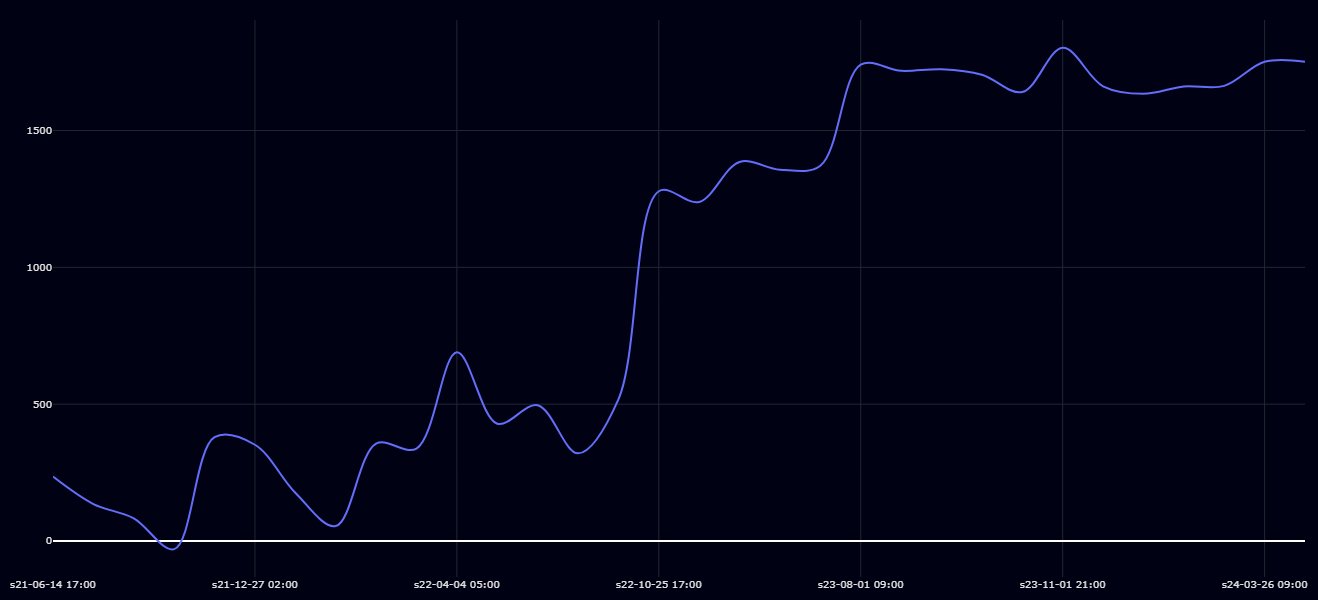

Pair: GBP_AUD - Gain: 1340.1


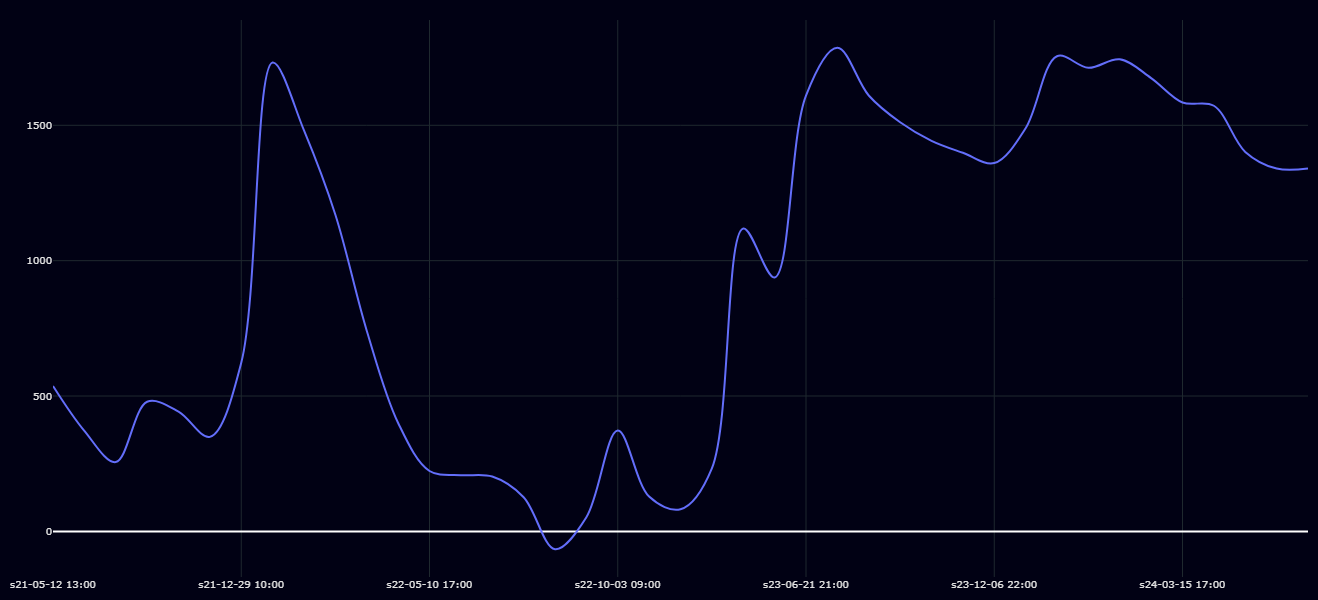

Pair: USD_SGD - Gain: 643.0


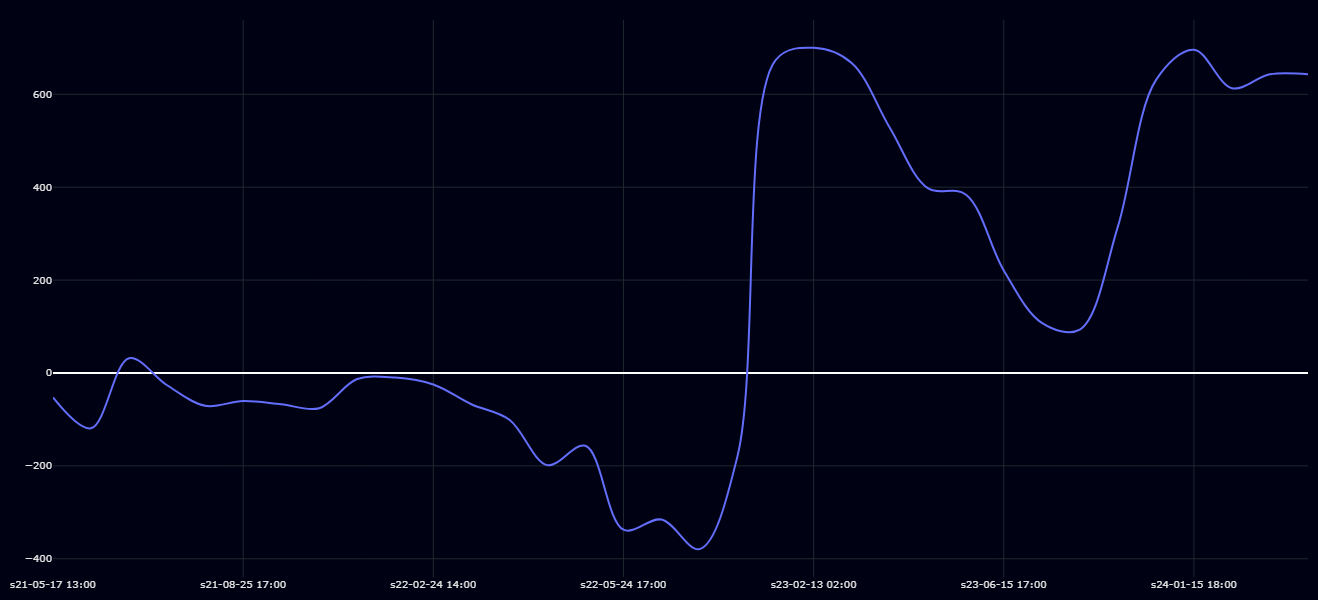

Pair: EUR_AUD - Gain: 353.9


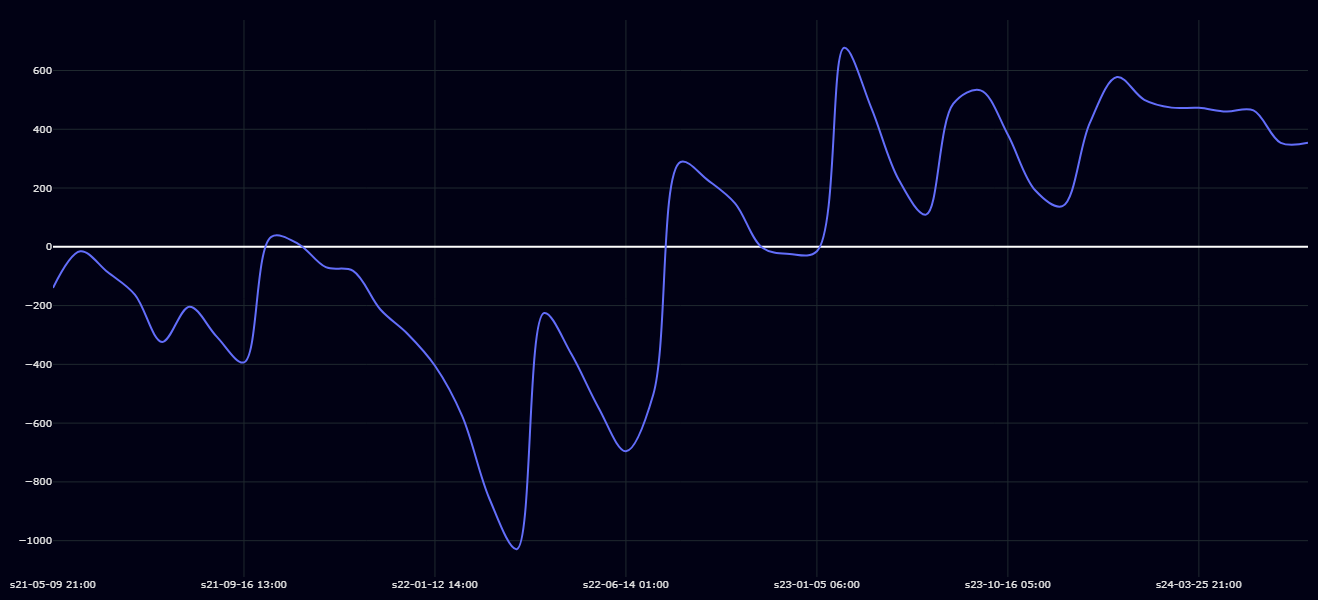

Pair: AUD_USD - Gain: 267.0


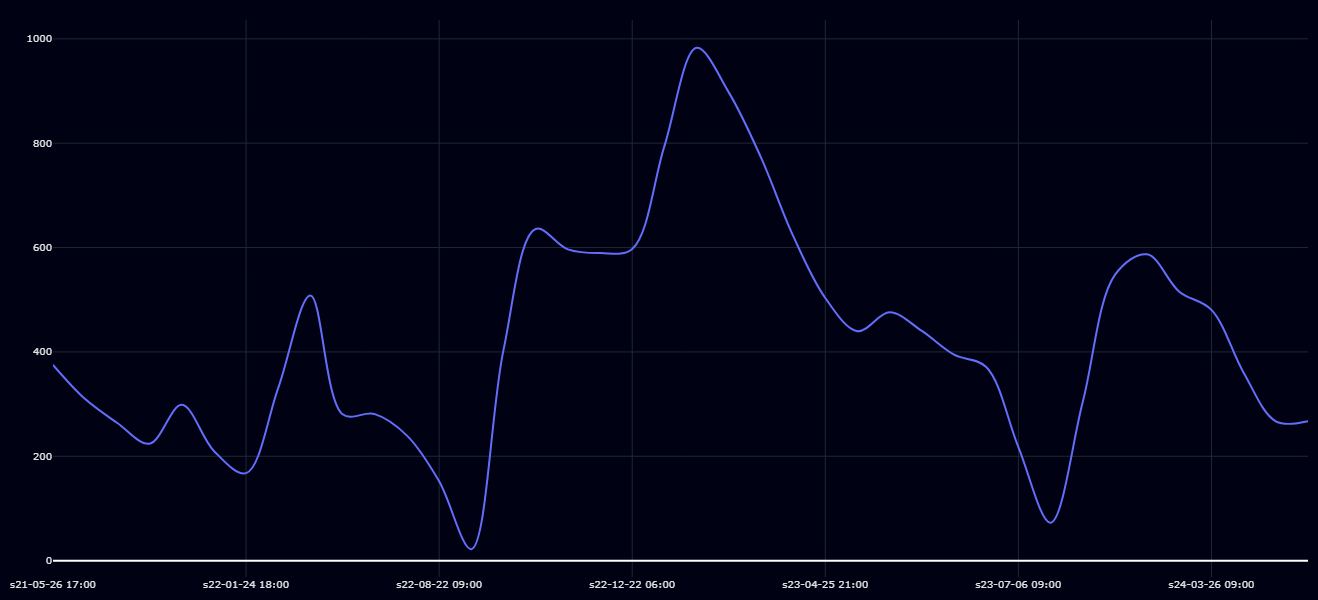

Pair: GBP_USD - Gain: 174.8


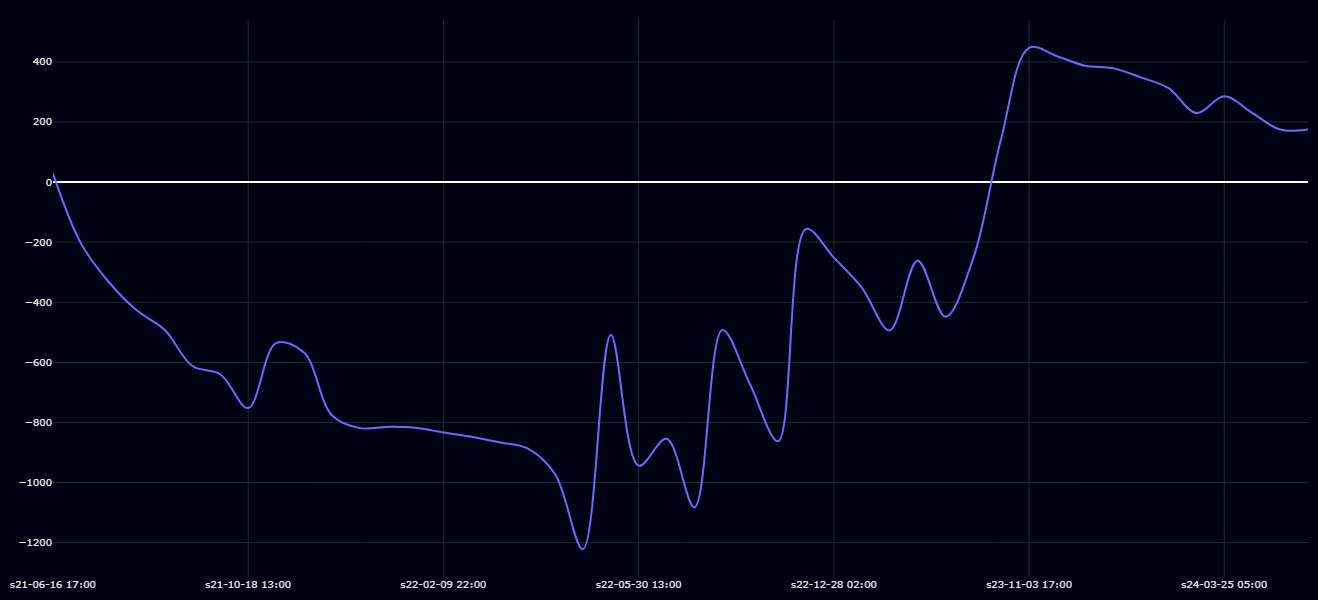

In [96]:
for pair in df_ma_20_ma_200[df_ma_20_ma_200['total_gain'] > 0]['pair'].unique():
    df_gains_pair = df_ma_trades_h4[(df_ma_trades_h4['cross'] == cross) & (df_ma_trades_h4['pair'] == pair)].copy()

    print(f'Pair: {pair} - Gain: {round(df_gains_pair['gain'].sum(), 2)}')

    candle_plot = CandlePlot(df_gains_pair, candles=False)
    candle_plot.show_plot(line_traces=['gain_cum'])